In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("archive/Data Science Salary 2021 to 2023.csv")

In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
df['experience_level'].unique()

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

In [5]:
mapemploytype = {'FT':'Full-Time', 'CT':'Contractor', 'FL':'Freelancer', 'PT':'Part-Time'}
df['employment_type'] = df['employment_type'].map(mapemploytype)

mapcompanysize = {"L":'Large', "M":'Medium', "S":'Small'}
df['company_size'] = df['company_size'].map(mapcompanysize)
mapexperiencelevel = {'EN':'Entry-Level', 'EX':'Experienced','MI':'Mid-Level','SE':'Senior'}
df['experience_level'] = df['experience_level'].map(mapexperiencelevel)

In [6]:
df['salary_currency'].unique()

array(['USD', 'INR', 'CAD', 'EUR', 'CHF', 'PLN', 'BRL', 'GBP', 'HKD',
       'SGD', 'THB', 'AUD', 'ILS', 'HUF', 'CZK', 'DKK', 'JPY', 'TRY',
       'CLP', 'MXN'], dtype=object)

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

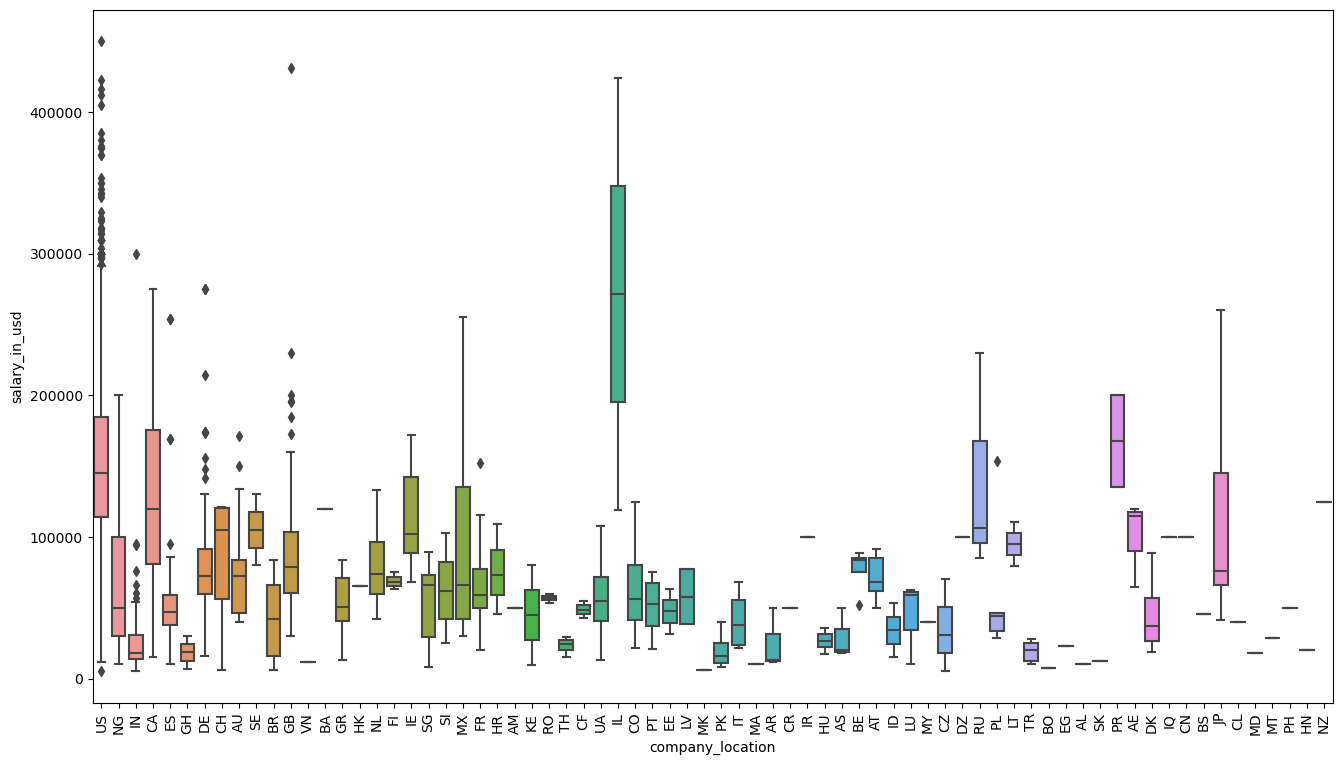

In [7]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
sns.boxplot(data = df, y = 'salary_in_usd', x = 'company_location')

<Axes: xlabel='company_location', ylabel='Mean Salary In USD'>

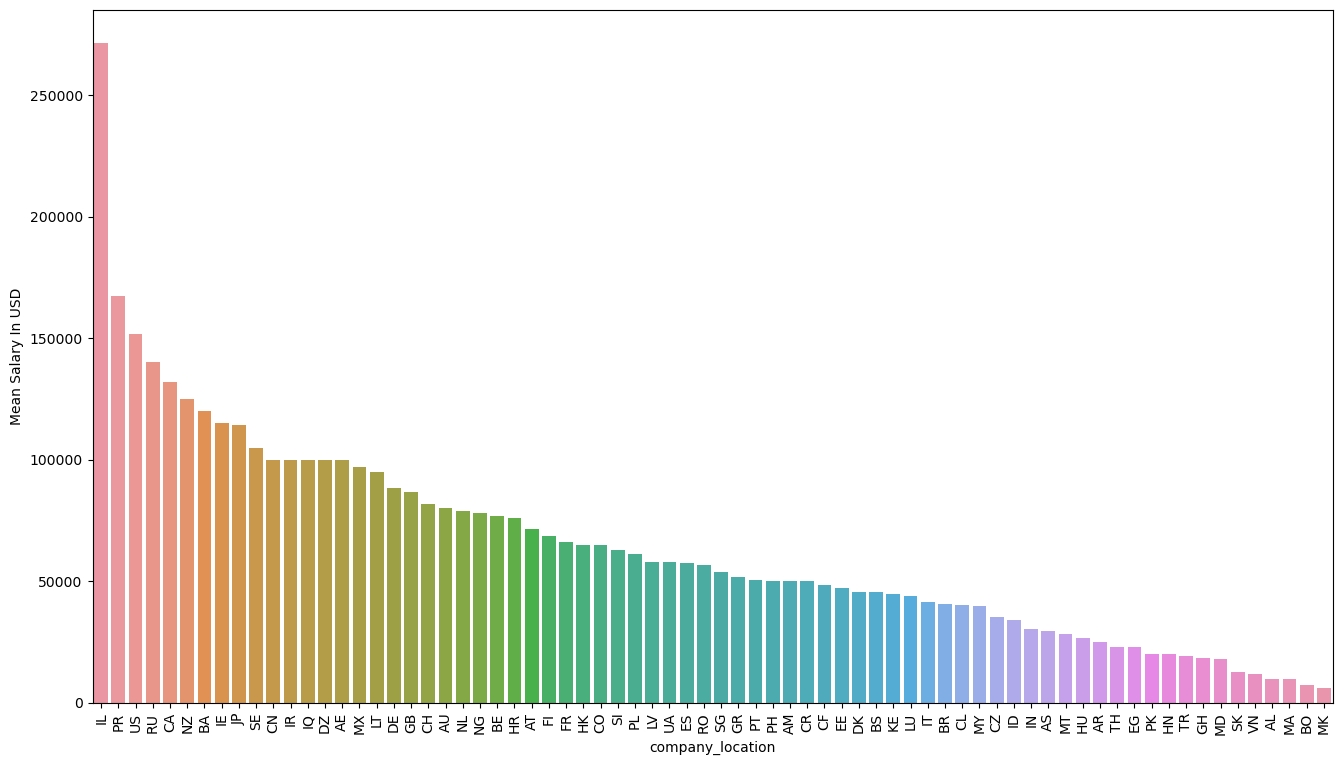

In [8]:
salarycompanylocation = df.groupby(by=['company_location']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.ylabel('Mean Salary In USD')
sns.barplot(x = salarycompanylocation.index, y = salarycompanylocation.values)


<Axes: xlabel='job_title', ylabel='Mean Salary In USD'>

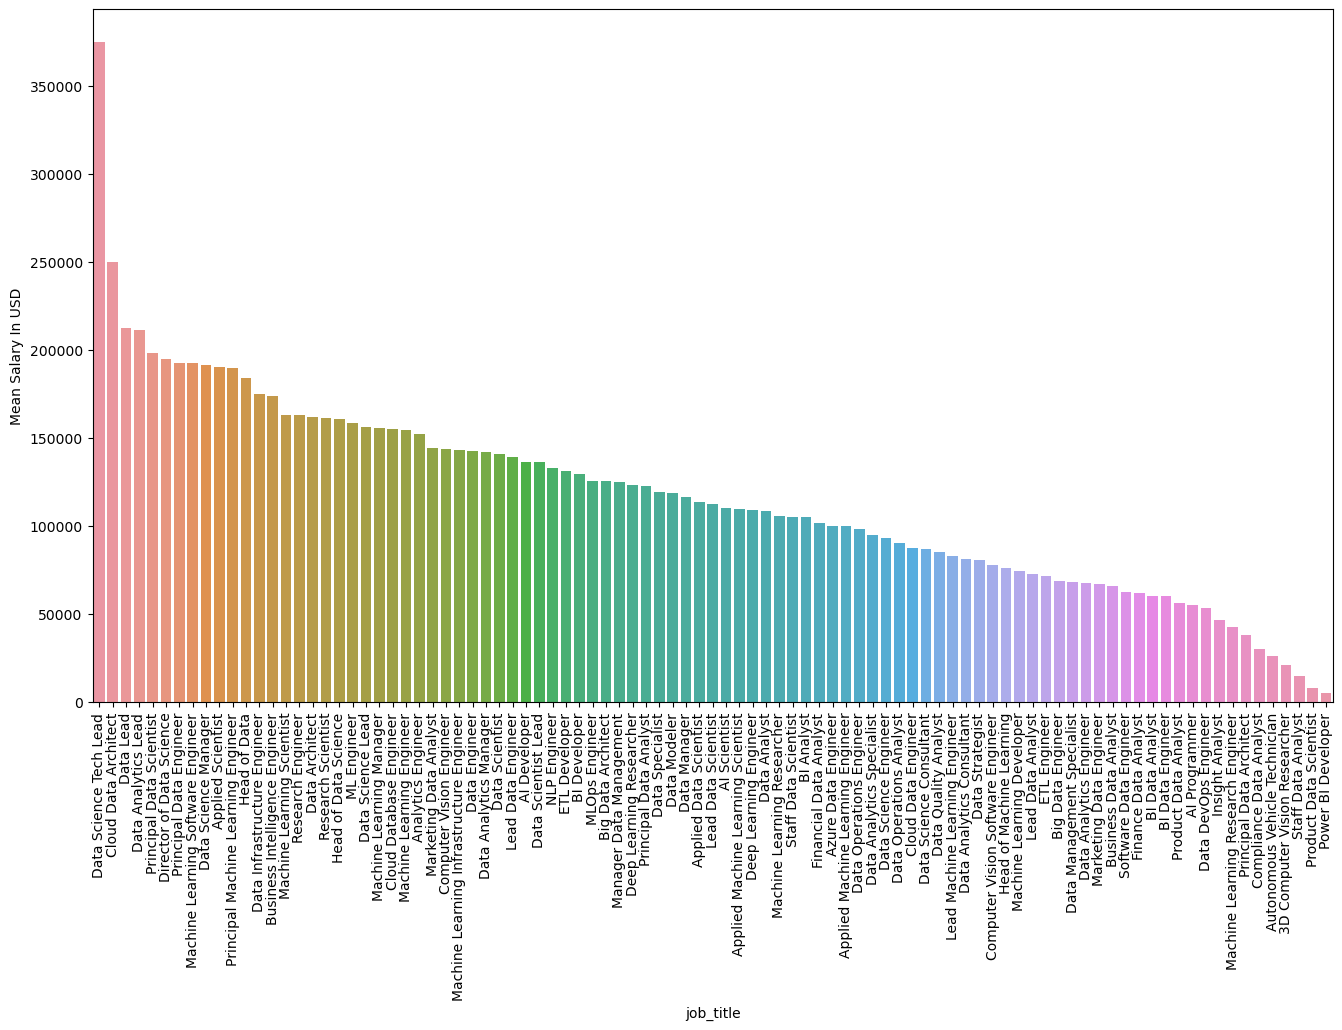

In [9]:
salaryjobtitle = df.groupby(by=['job_title']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.ylabel('Mean Salary In USD')
sns.barplot(x = salaryjobtitle.index, y = salaryjobtitle.values)


<Axes: xlabel='experience_level', ylabel='Mean Salary In USD'>

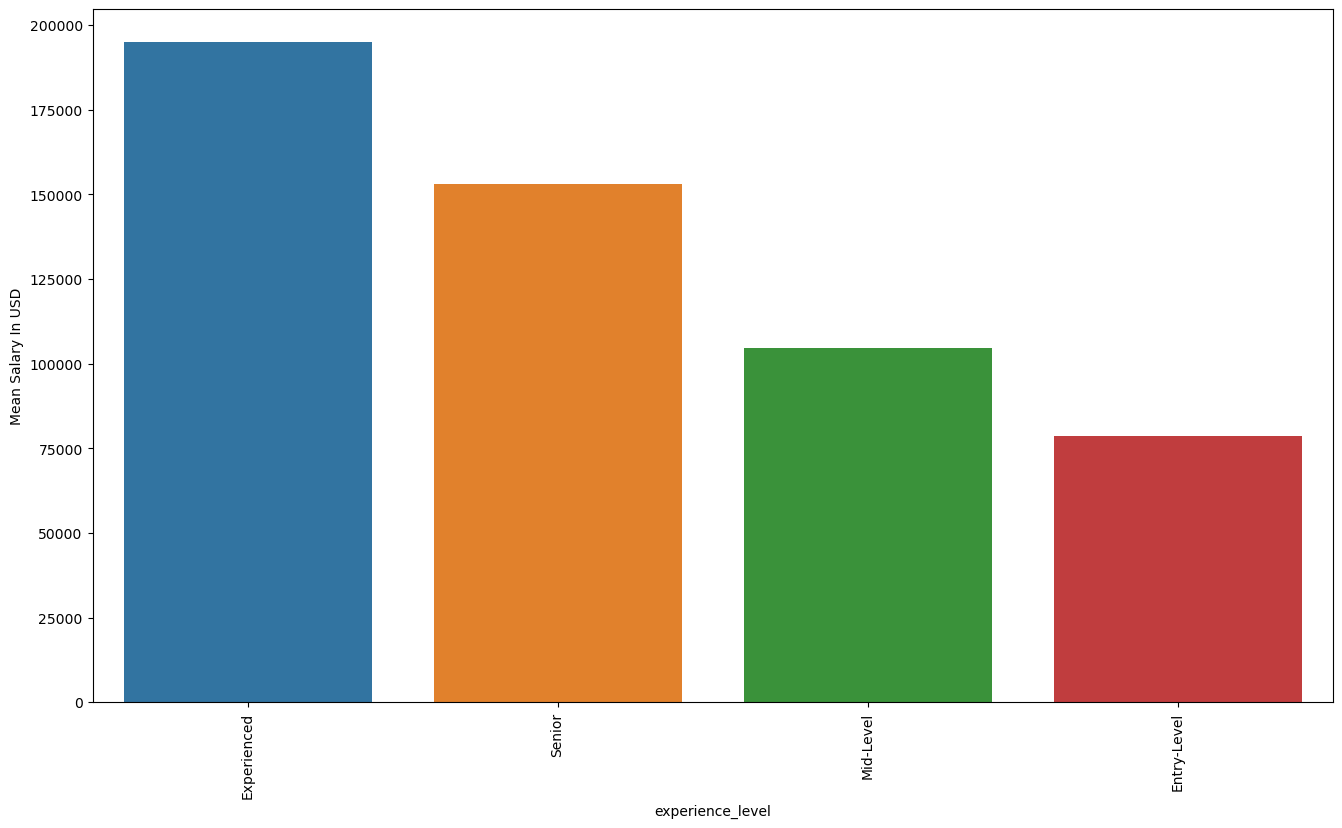

In [10]:
salaryexperiencelevel = df.groupby(by=['experience_level']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.ylabel('Mean Salary In USD')
sns.barplot(x = salaryexperiencelevel.index, y = salaryexperiencelevel.values)


### Experience_level:
The level of work experience of the employees, categorized as EN (Entry-Level), EX (Experienced), MI (Mid-Level), SE (Senior).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


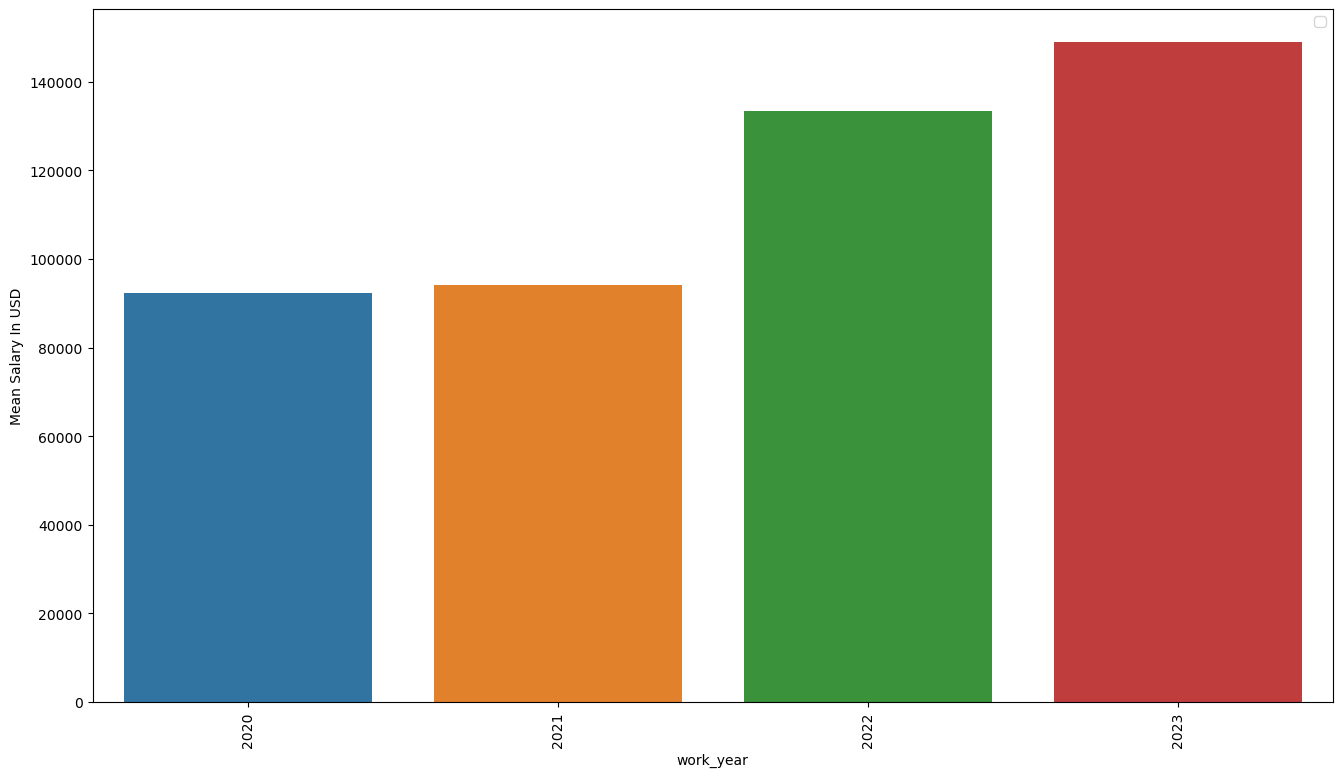

In [11]:
salaryworkyear = df.groupby(by=['work_year']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.ylabel('Mean Salary In USD')
sns.barplot(x = salaryworkyear.index, y = salaryworkyear.values)
plt.legend()

<Axes: xlabel='employment_type', ylabel='Mean Salary In USD'>

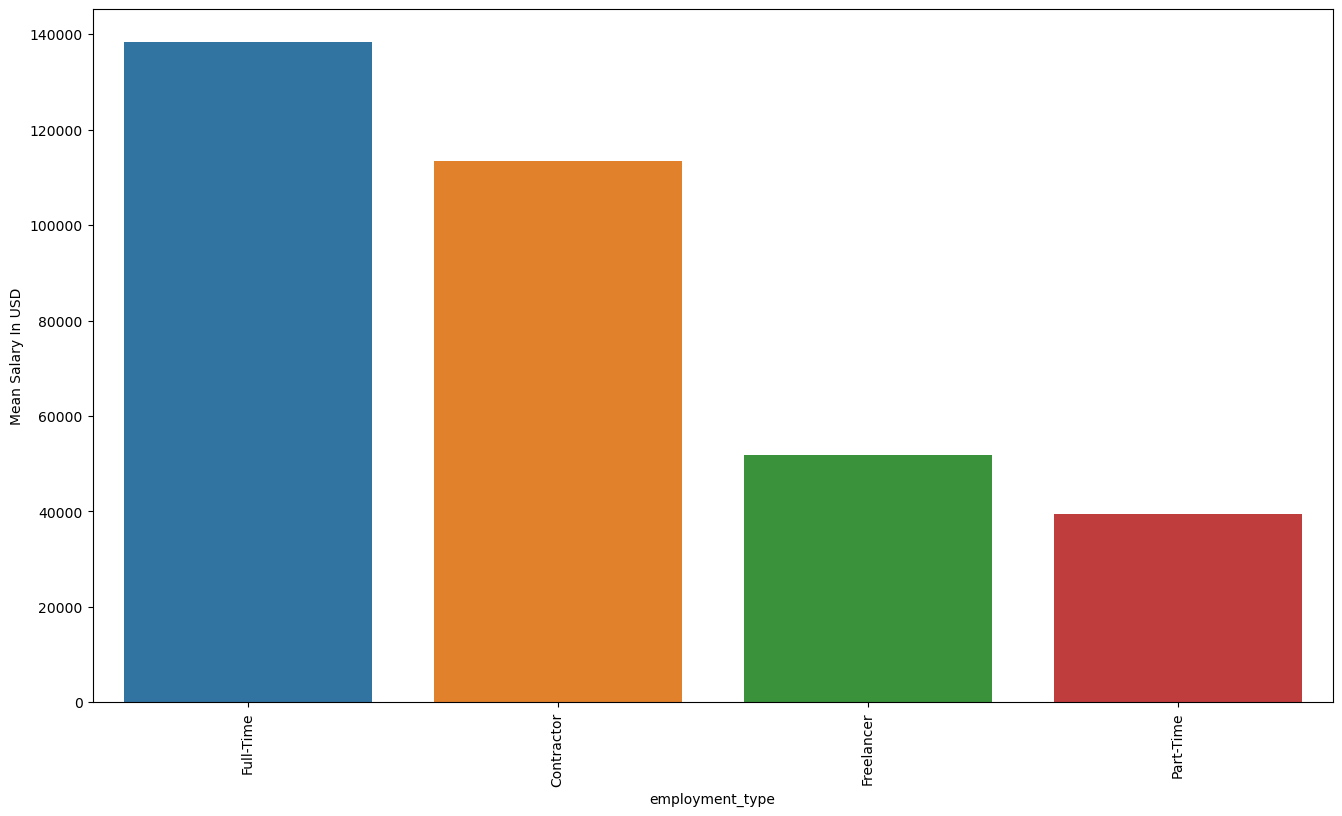

In [12]:
salaryemployment_type = df.groupby(by=['employment_type']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.ylabel('Mean Salary In USD')
sns.barplot(x = salaryemployment_type.index, y = salaryemployment_type.values)


### Employment_type:
The type of employment, labelled as FT (Full-Time), CT (Contractor), FL (Freelancer), PT (Part-Time).

<Axes: xlabel='company_size', ylabel='Mean Salary In USD'>

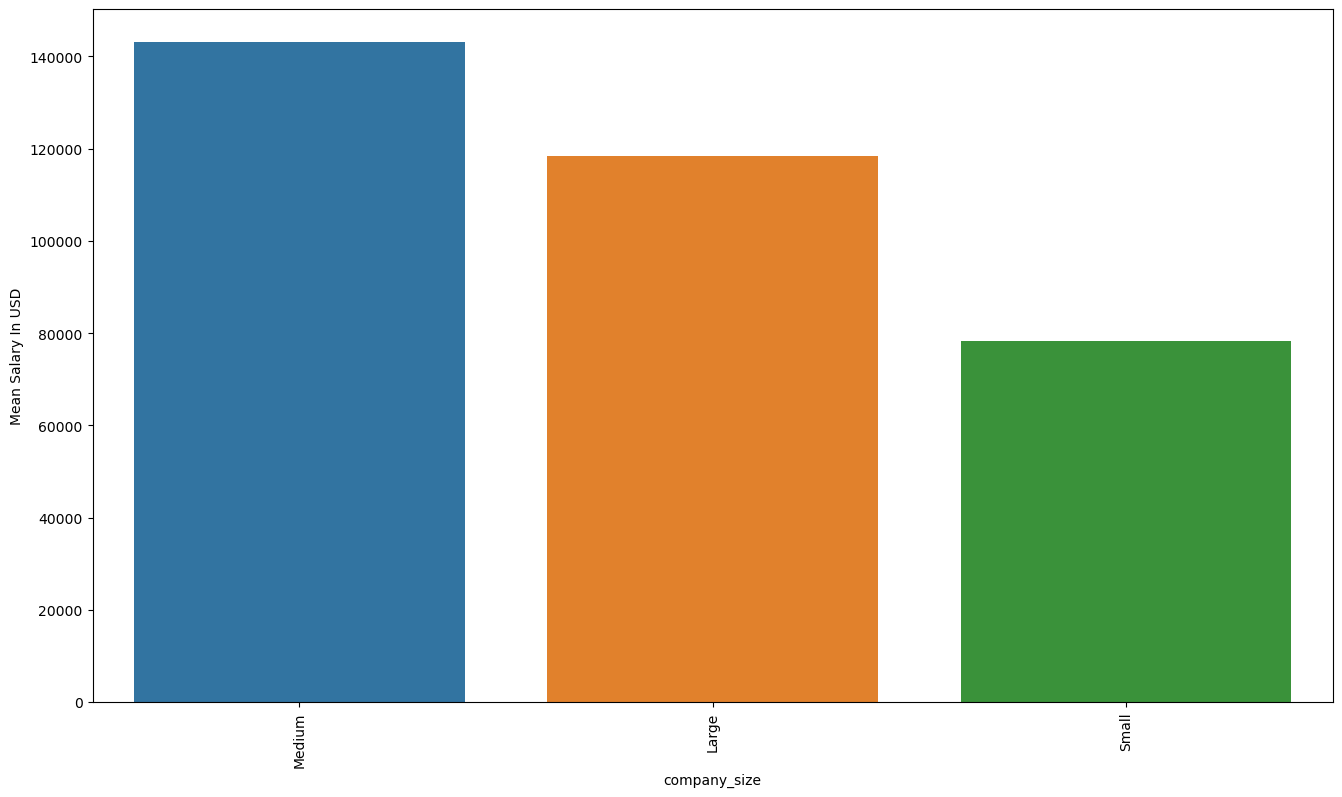

In [13]:
salarycompany_size = df.groupby(by=['company_size']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)

plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.ylabel('Mean Salary In USD')
sns.barplot(x = salarycompany_size.index, y = salarycompany_size.values)

### Company_size: 
The size of the companies, classified as "L" (Large), "M" (Medium), and "S" (Small).

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

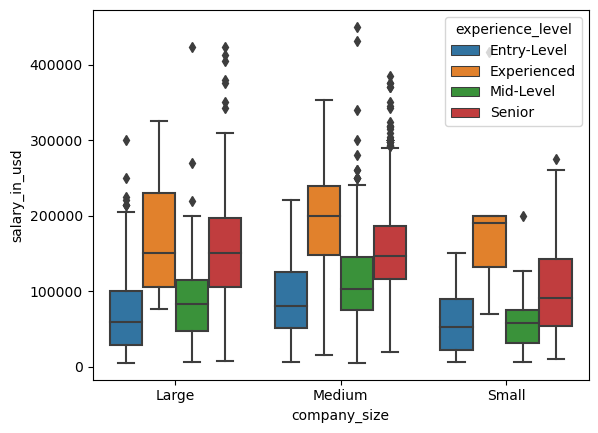

In [14]:
sns.boxplot(x = df['company_size'], y = df['salary_in_usd'], hue = df['experience_level'])

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

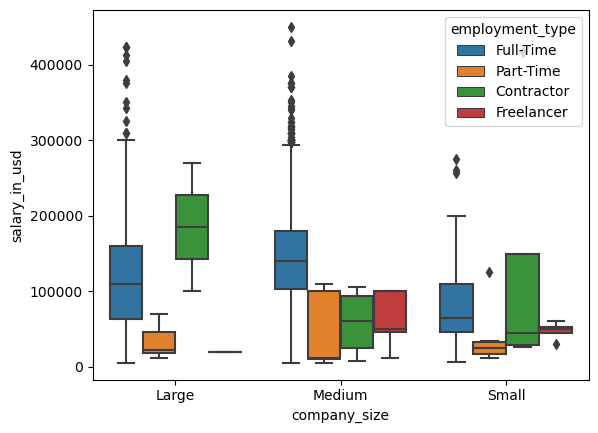

In [15]:
sns.boxplot(x = df['company_size'], y = df['salary_in_usd'], hue = df['employment_type'])

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

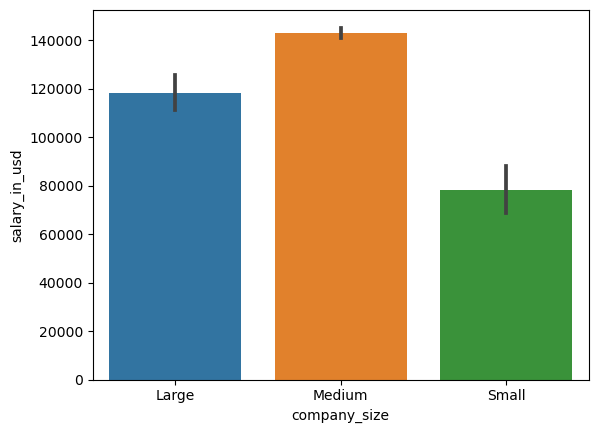

In [16]:
sns.barplot(x = df['company_size'], y = df['salary_in_usd'])#

<Axes: xlabel='company_size'>

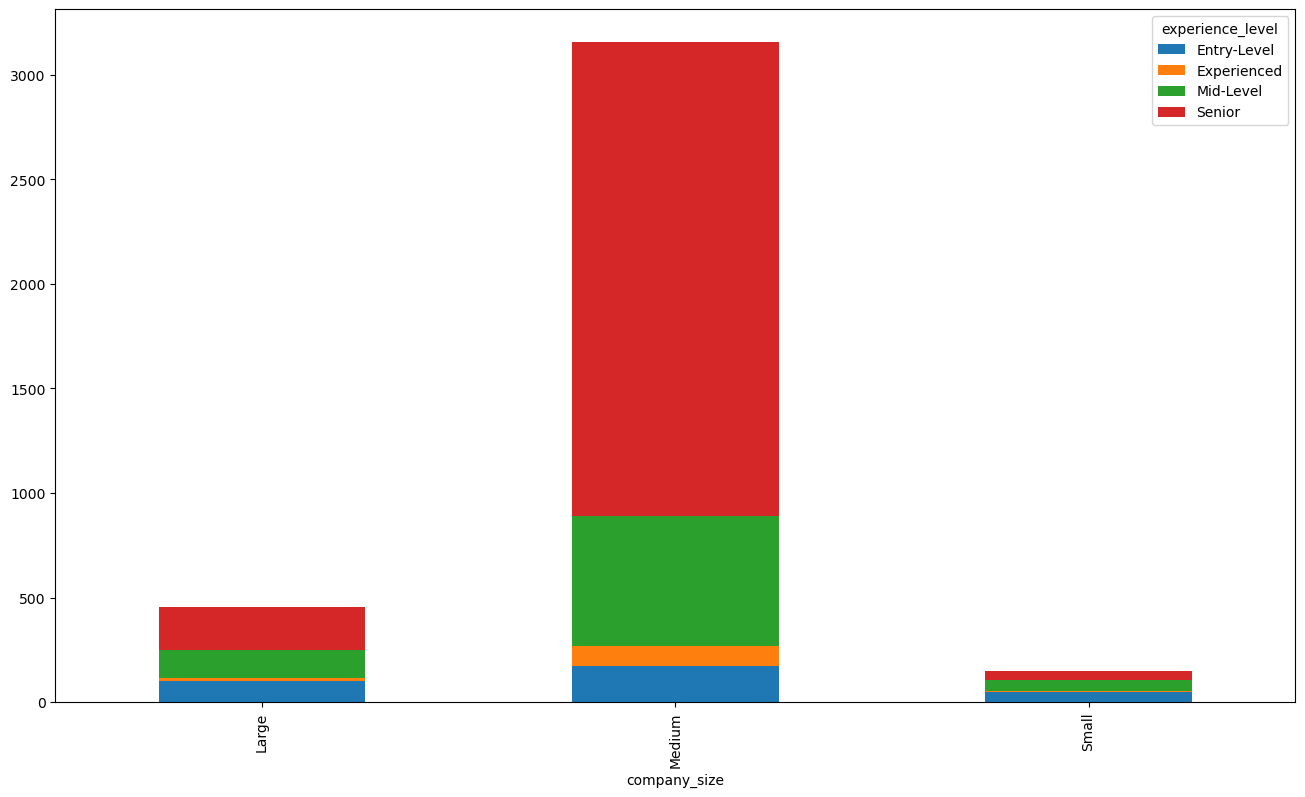

In [17]:
df_plot = df.groupby(['company_size', 'experience_level']).size().reset_index().pivot(columns='experience_level', index='company_size', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(16,9))

In [18]:
#top ten avarage salaries
#df[['salary_in_usd','job_title']]

[Text(0, 0.5, 'Salary in USD'),
 Text(0.5, 0, 'Jobs'),
 Text(0.5, 1.0, 'Average Top Ten Salaries Jobs')]

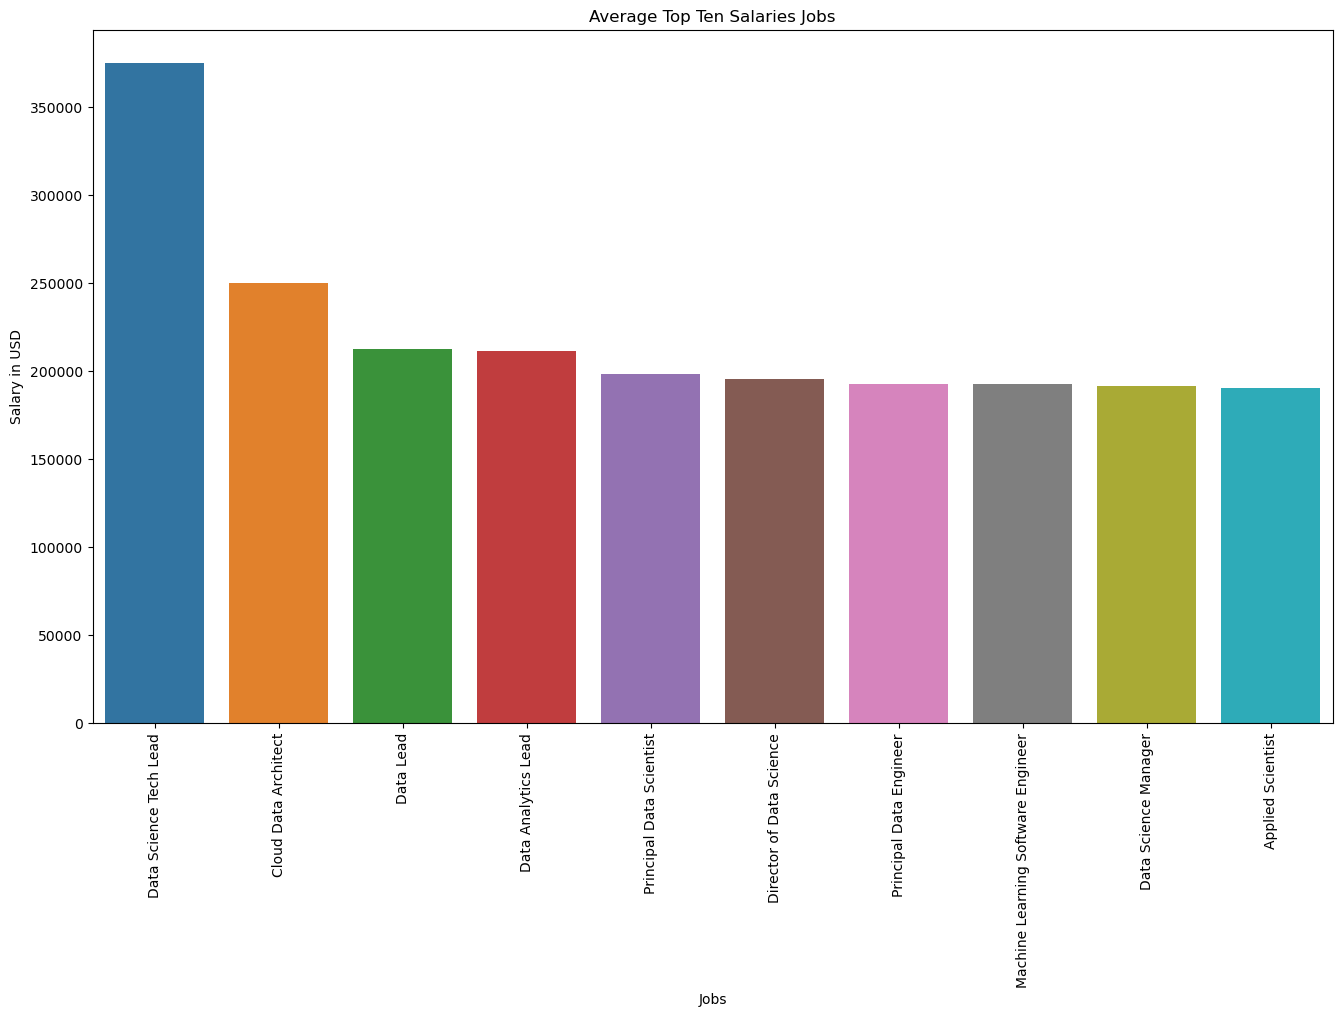

In [19]:
topavgtensalariesjobs = df.groupby(by=['job_title']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)[0:10]
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plot = sns.barplot(x = topavgtensalariesjobs.index, y = topavgtensalariesjobs.values)
plot.set(ylabel ="Salary in USD", xlabel = "Jobs", title ='Average Top Ten Salaries Jobs')


In [20]:
toptensalaries = topavgtensalariesjobs.index

In [21]:
toptensalariesdf = df[df['job_title'].isin(toptensalaries)]

<Axes: xlabel='experience_level'>

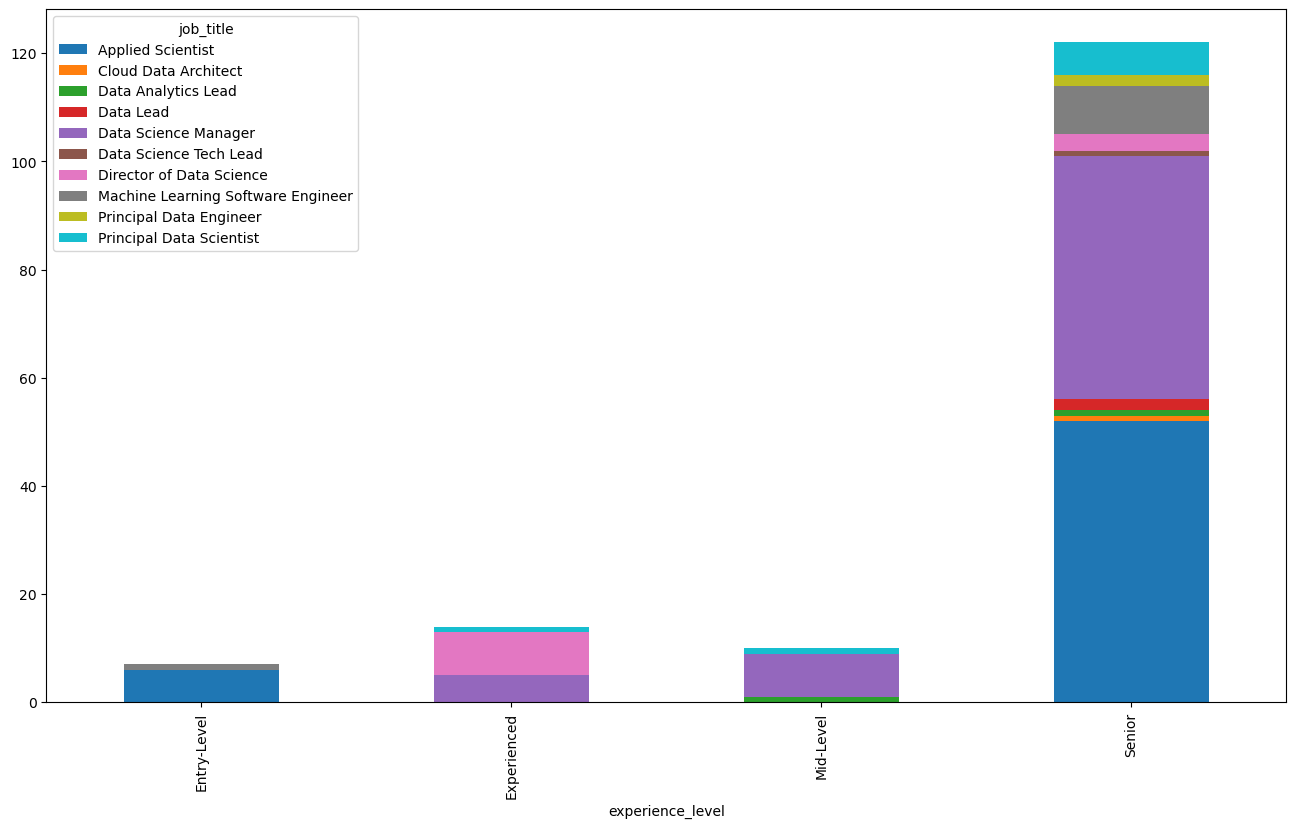

In [22]:
plt.figure
df_plot = toptensalariesdf.groupby(['job_title', 'experience_level']).size().reset_index().pivot(columns='job_title', index='experience_level', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(16,9))

##maior parte são seniors nos melhores empregos

<Axes: xlabel='company_size'>

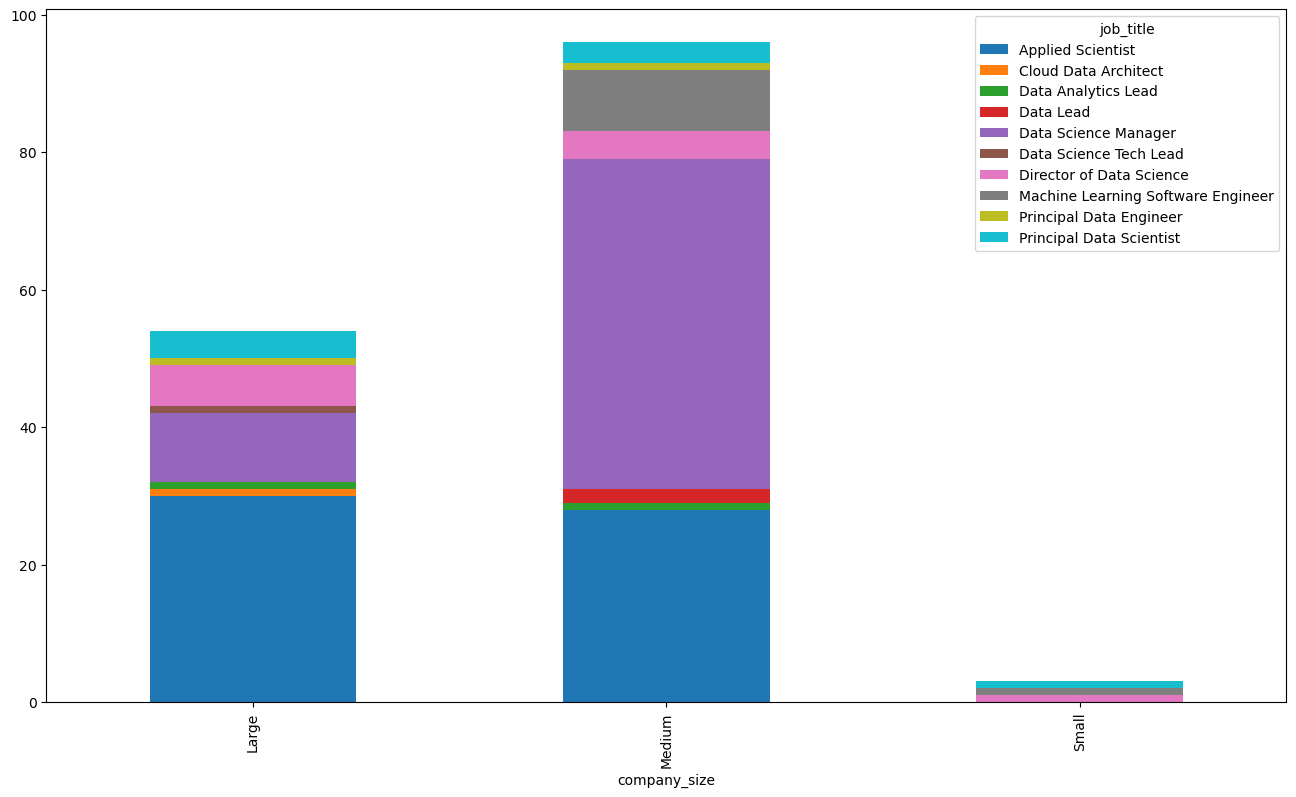

In [23]:

df_plot = toptensalariesdf.groupby(['job_title', 'company_size']).size().reset_index().pivot(columns='job_title', index='company_size', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(16,9))

##maior parte em medias e grandes empresas

[Text(0, 0.5, 'Salary in USD'),
 Text(0.5, 0, 'Company Location'),
 Text(0.5, 1.0, 'Average Top Ten Country Location salaries')]

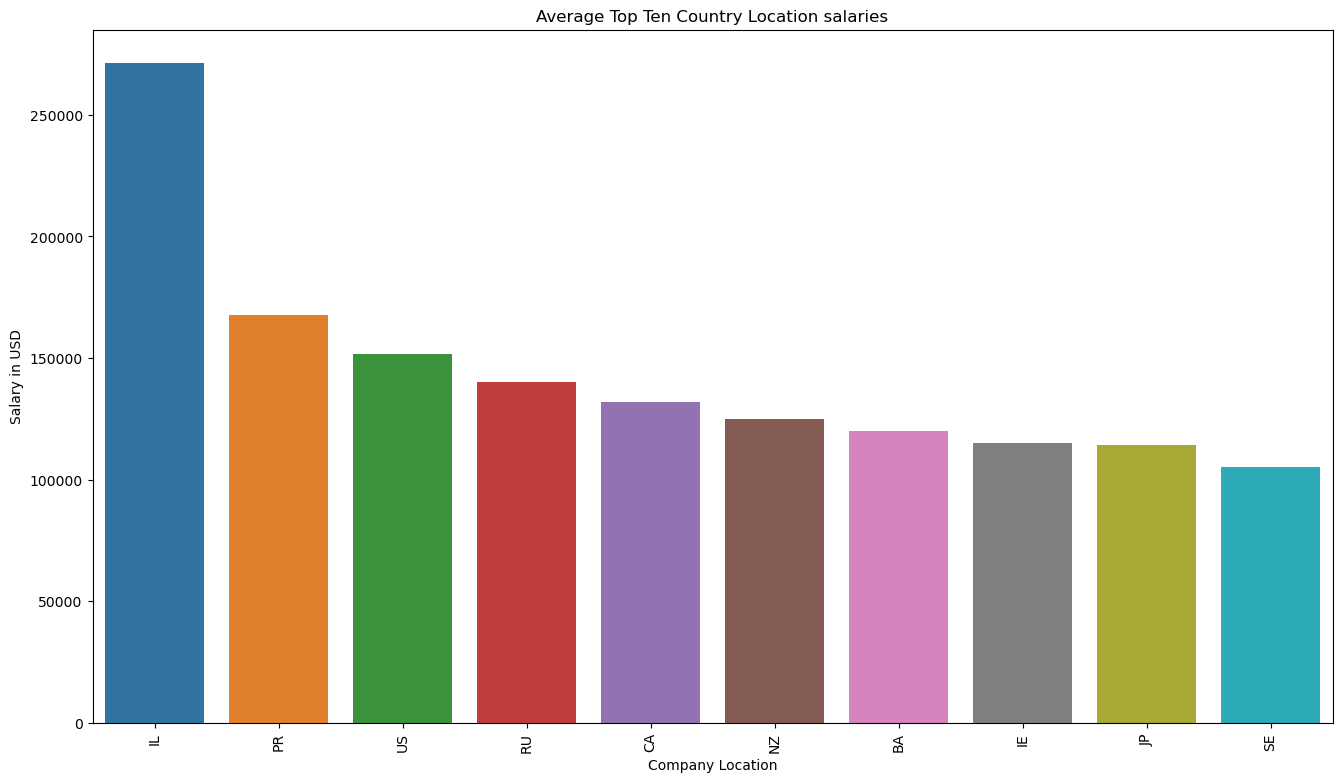

In [24]:
topavgcountrloc = df.groupby(by=['company_location']).describe()['salary_in_usd']['mean'].sort_values(ascending = False)[0:10]
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plot = sns.barplot(x = topavgcountrloc.index, y = topavgcountrloc.values)
plot.set(ylabel ="Salary in USD", xlabel = "Company Location", title ='Average Top Ten Country Location salaries')


[Text(0, 0.5, 'Salary in USD'),
 Text(0.5, 0, 'Jobs'),
 Text(0.5, 1.0, 'Top 10 jobs with more employees')]

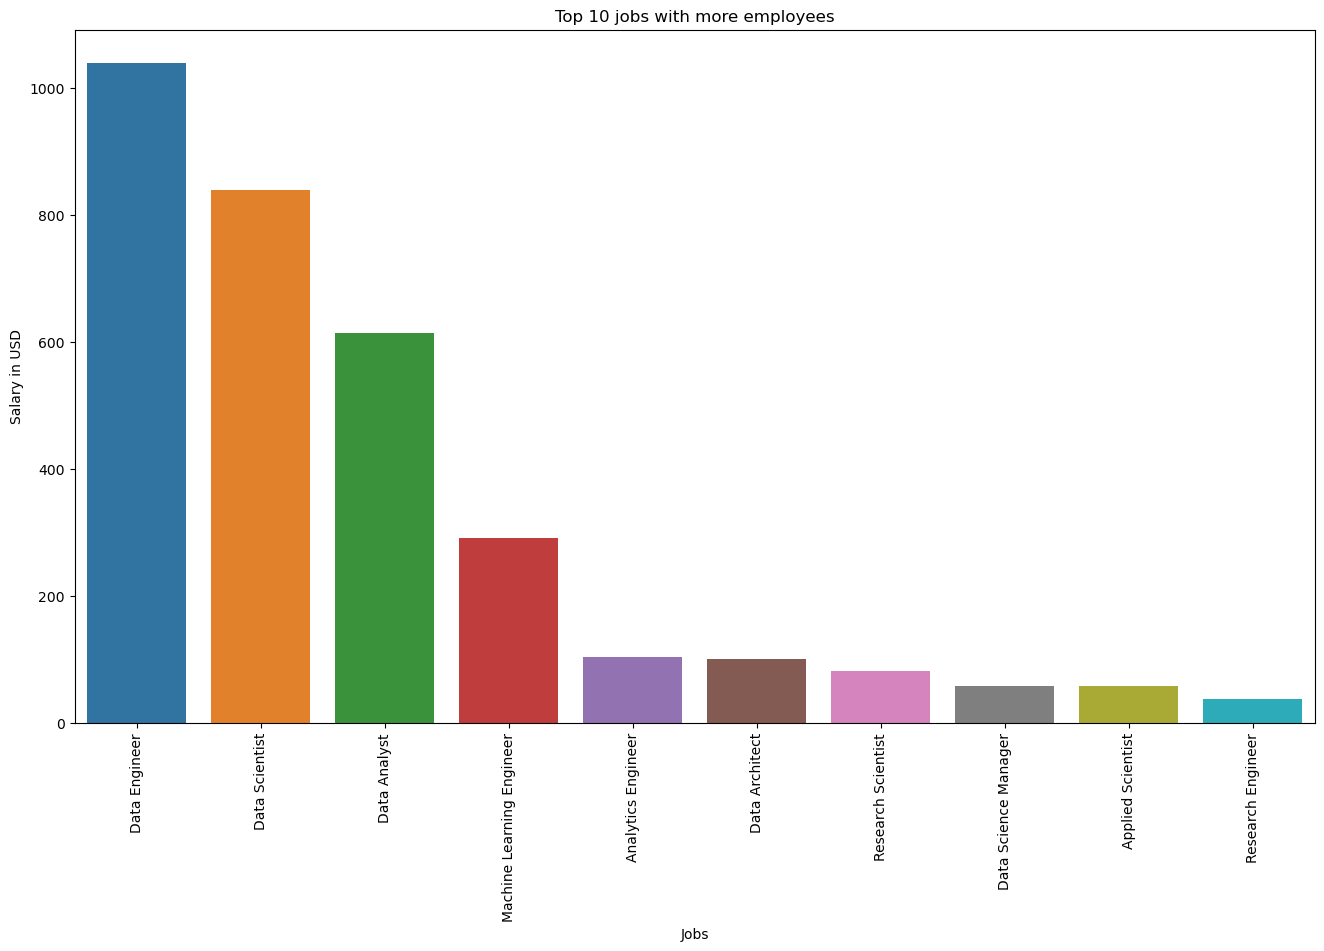

In [25]:
mostemployes = df.groupby(by=['job_title']).describe()['salary']['count'].sort_values(ascending = False)[0:10]
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plot = sns.barplot(x = mostemployes.index, y = mostemployes.values)
plot.set(ylabel ="Salary in USD", xlabel = "Jobs", title ='Top 10 jobs with more employees')

In [26]:
mostemployes = df.groupby(by=['job_title']).describe()['salary']['count'].sort_values(ascending = False)[0:10]
val = mostemployes.values
ind = mostemployes.index.values

[]

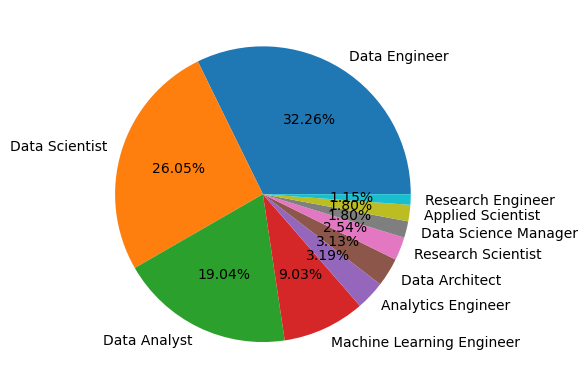

In [27]:
plt.pie(val, labels = ind,autopct="%1.2f%%")
plt.plot()

In [29]:
tenmostemp = mostemployes.index
tenmostemp = df[df['job_title'].isin(tenmostemp)]


<Axes: xlabel='company_size'>

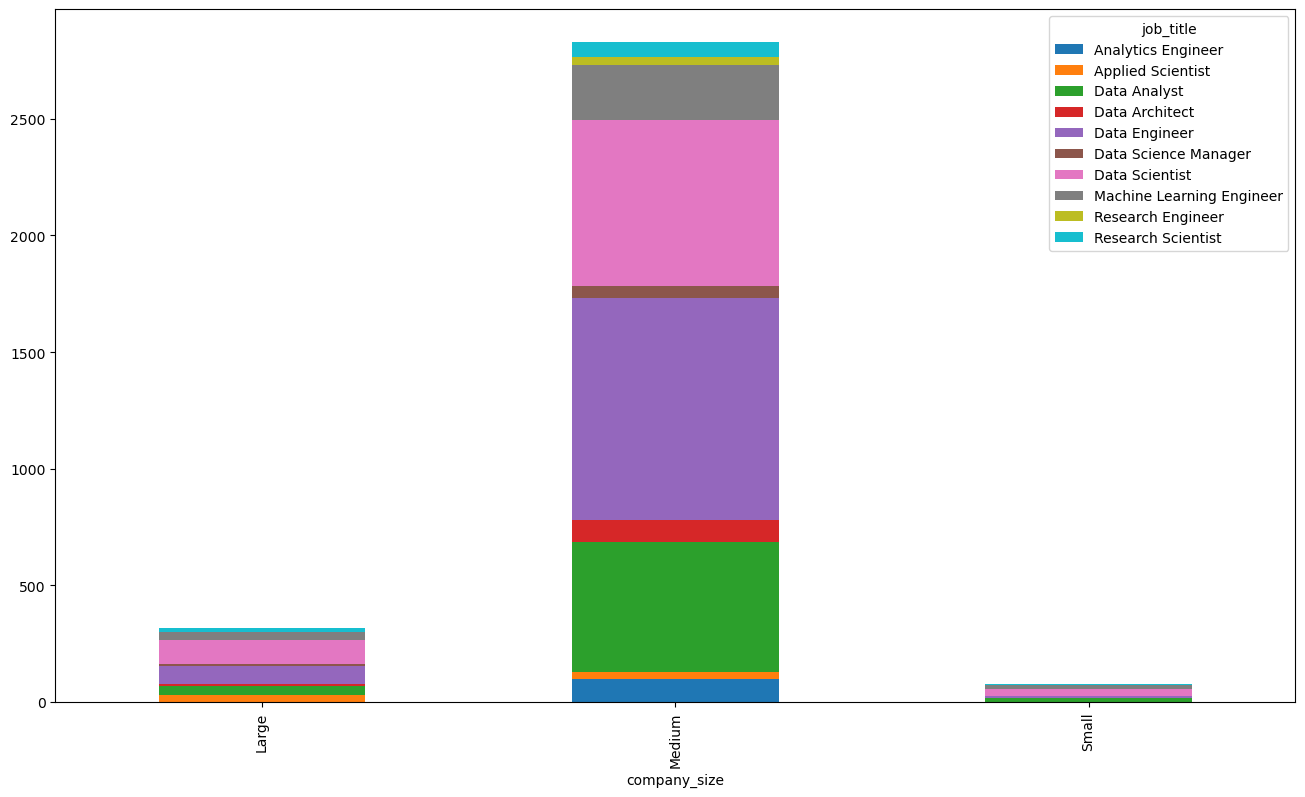

In [30]:
df_plot = tenmostemp.groupby(['job_title', 'company_size']).size().reset_index().pivot(columns='job_title', index='company_size', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(16,9))

<Axes: xlabel='experience_level'>

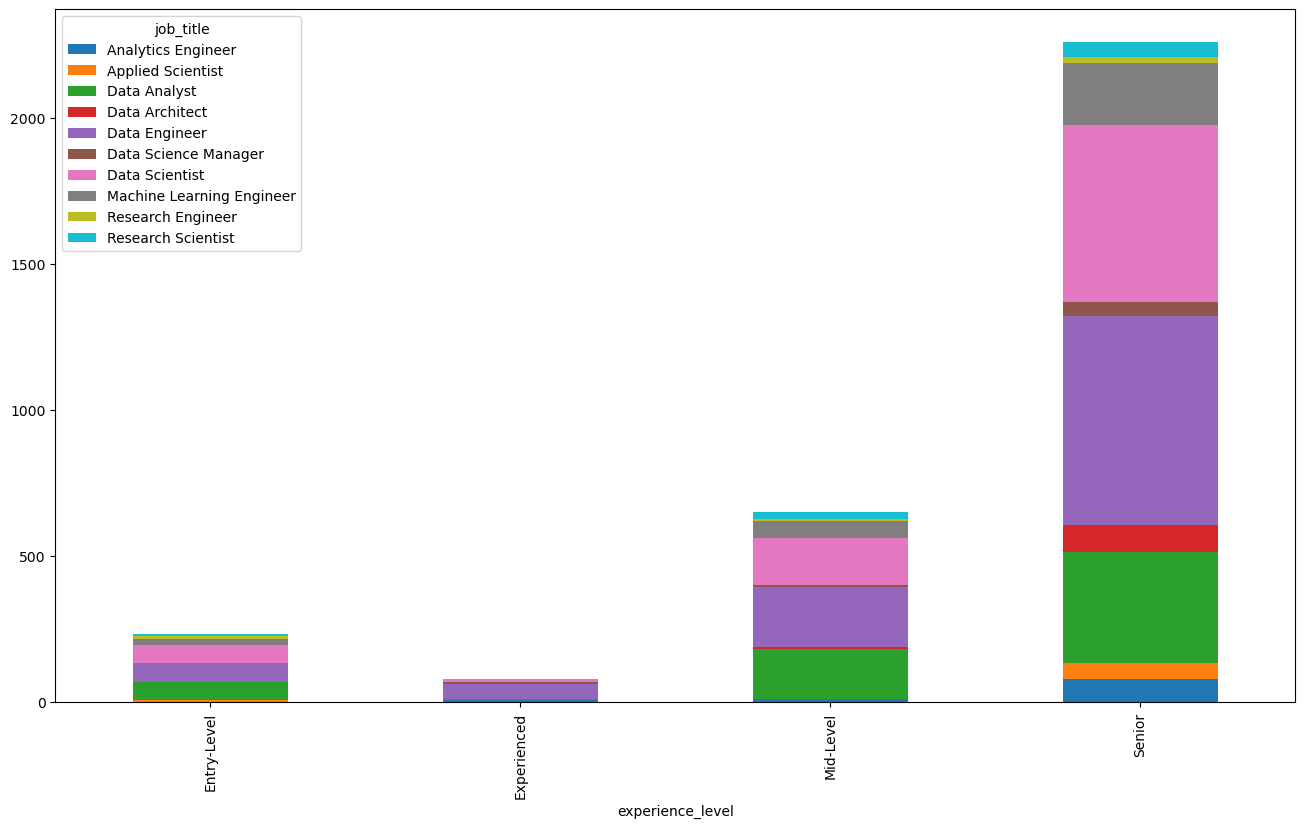

In [31]:
df_plot = tenmostemp.groupby(['job_title', 'experience_level']).size().reset_index().pivot(columns='job_title', index='experience_level', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(16,9))

In [32]:
workyearsalary = df.groupby('work_year').describe()['salary_in_usd']['mean']
#workyearsalary

<Axes: xlabel='Year', ylabel='Avg Salary'>

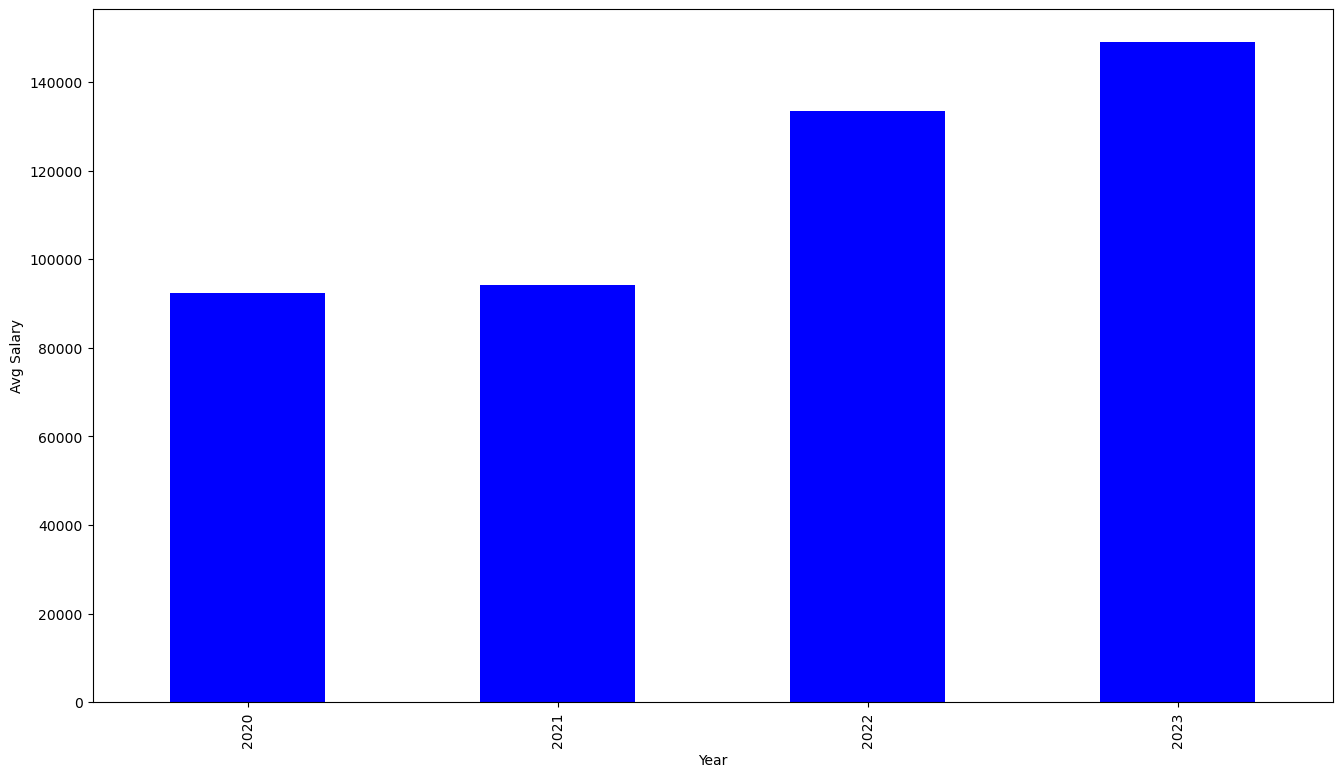

In [33]:
plt.figure(figsize=(16,9))
workyearsalary.plot(kind = 'bar', color = 'blue', xlabel = 'Year', ylabel = 'Avg Salary')


<bound method Axes.plot of <Axes: xlabel='Year', ylabel='Avg Salary'>>

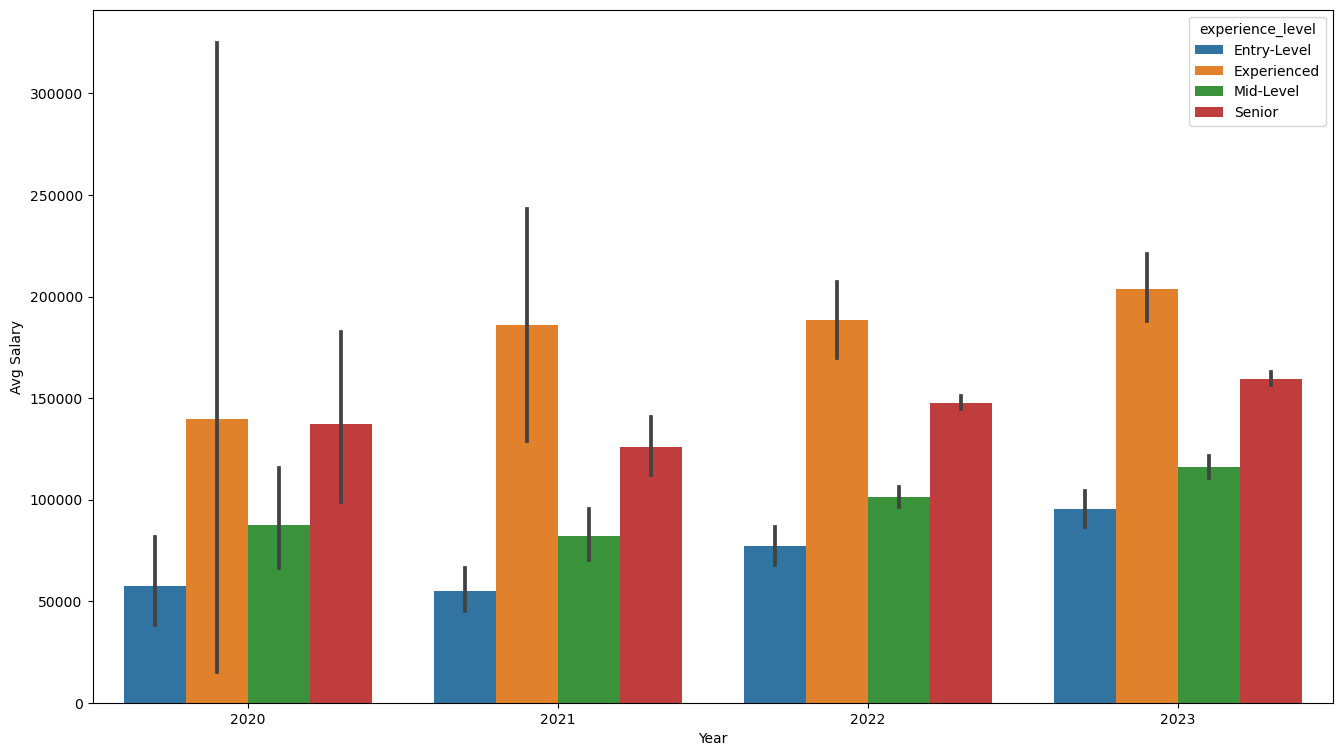

In [34]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['experience_level'])
ax.set(xlabel = 'Year', ylabel = 'Avg Salary')
ax.plot

C:\Users\vitor\AppData\Local\Temp\ipykernel_12800\4094769415.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['experience_level'],ci=None)


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Avg Salary')]

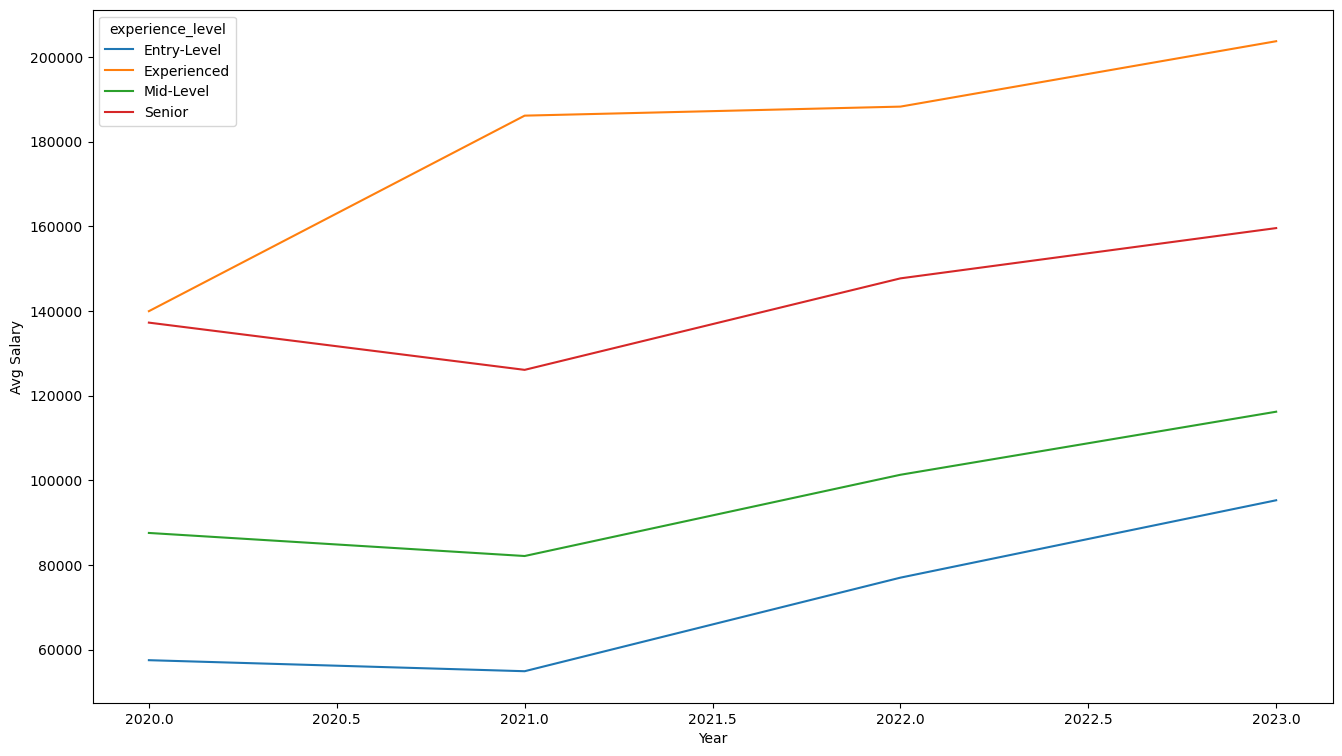

In [35]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['experience_level'],ci=None)

ax.set(xlabel = 'Year', ylabel = 'Avg Salary')

C:\Users\vitor\AppData\Local\Temp\ipykernel_12800\3023638679.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['employment_type'],ci=None)


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Avg Salary')]

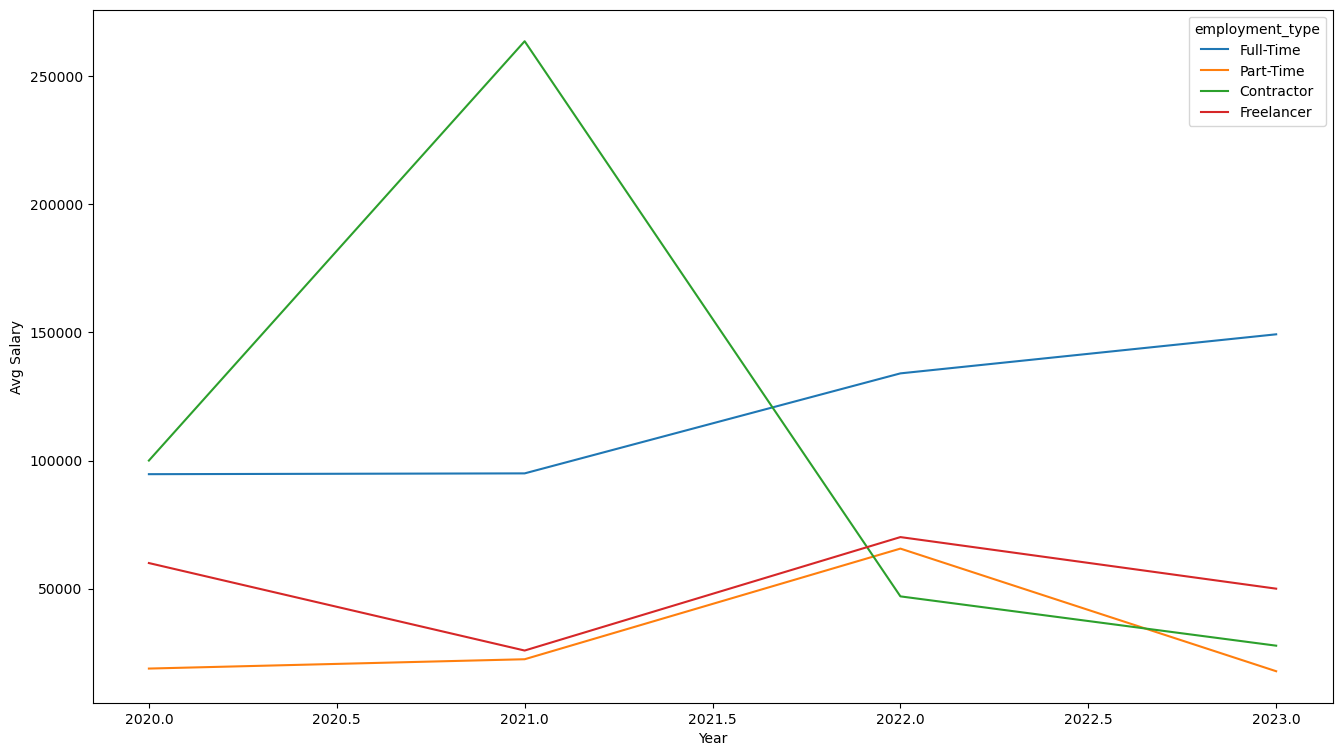

In [36]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['employment_type'],ci=None)

ax.set(xlabel = 'Year', ylabel = 'Avg Salary')

C:\Users\vitor\AppData\Local\Temp\ipykernel_12800\597384279.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['employment_type'], ci = None)


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Avg Salary')]

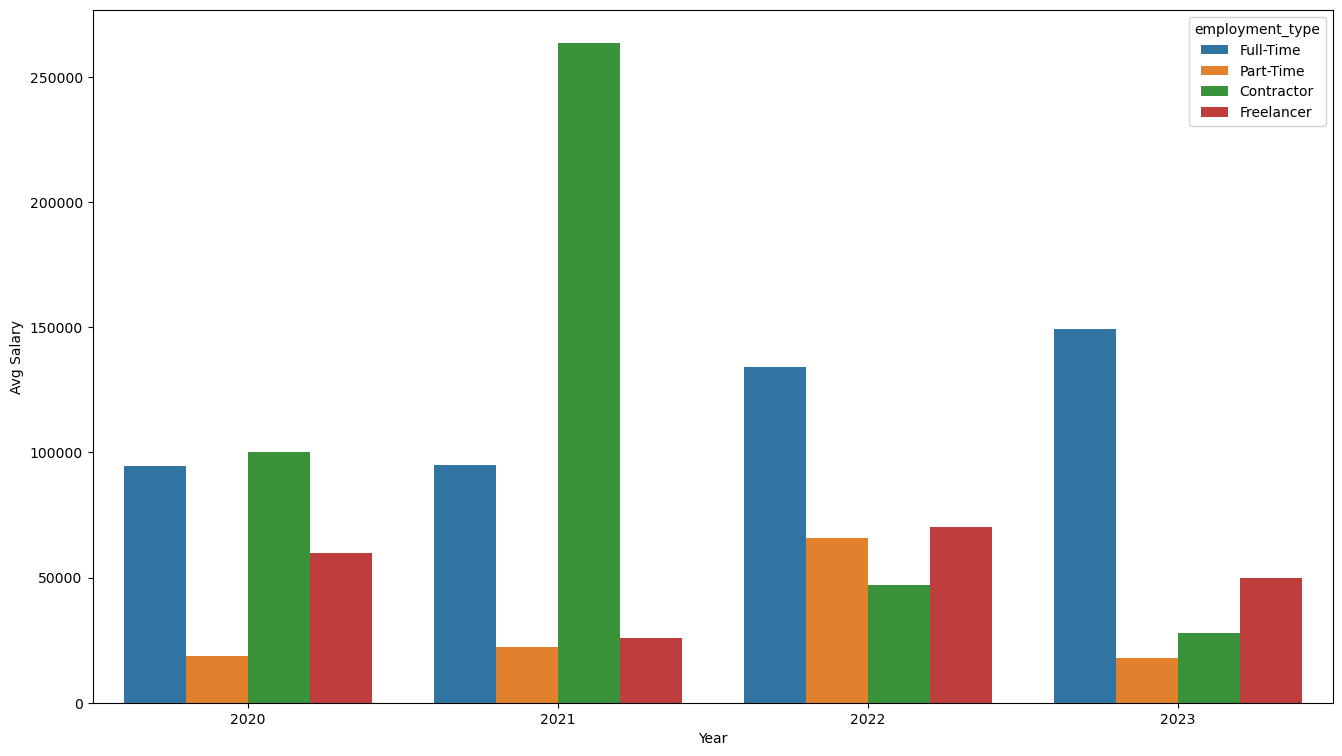

In [37]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x = df['work_year'], y = df['salary_in_usd'], hue = df['employment_type'], ci = None)
ax.set(xlabel = 'Year', ylabel = 'Avg Salary')
